# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [4]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256

In [29]:
results_SGD = {}
results_RMS = {}
results_Ada = {}
results_Adam = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr, momentum=0.8)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp: lr-%s" % (str(lr))
    results_SGD[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp: lr-%s" % (str(lr))
    results_RMS[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp: lr-%s" % (str(lr))
    results_Ada[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp: lr-%s" % (str(lr))
    results_Adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============================

50000/50000 [==============================] - 9s 189us/step - loss: 1.6360 - acc: 0.4290 - val_loss: 1.6325 - val_acc: 0.4324
Epoch 15/30
50000/50000 [==============================] - 10s 191us/step - loss: 1.6224 - acc: 0.4343 - val_loss: 1.6443 - val_acc: 0.4236
Epoch 16/30
50000/50000 [==============================] - 10s 192us/step - loss: 1.6094 - acc: 0.4392 - val_loss: 1.6147 - val_acc: 0.4337
Epoch 17/30
50000/50000 [==============================] - 9s 184us/step - loss: 1.5987 - acc: 0.4429 - val_loss: 1.6064 - val_acc: 0.4384
Epoch 18/30
50000/50000 [==============================] - 9s 188us/step - loss: 1.5876 - acc: 0.4461 - val_loss: 1.5917 - val_acc: 0.4488
Epoch 19/30
50000/50000 [==============================] - 10s 194us/step - loss: 1.5752 - acc: 0.4507 - val_loss: 1.5867 - val_acc: 0.4394
Epoch 20/30
50000/50000 [==============================] - 9s 183us/step - loss: 1.5653 - acc: 0.4550 - val_loss: 1.5788 - val_acc: 0.4498
Epoch 21/30
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 268us/step - loss: 14.4451 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 12s 242us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 12s 240us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 12s 245us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 12s 243us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 12s 248us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 12s 241us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 12s 237us/step - loss: 1.2174 - acc: 0.5654 - val_loss: 1.5575 - val_acc: 0.4615
Epoch 22/30
50000/50000 [==============================] - 12s 240us/step - loss: 1.1978 - acc: 0.5735 - val_loss: 1.5979 - val_acc: 0.4639
Epoch 23/30
50000/50000 [==============================] - 12s 232us/step - loss: 1.1731 - acc: 0.5820 - val_loss: 1.6780 - val_acc: 0.4396
Epoch 24/30
50000/50000 [==============================] - 12s 239us/step - loss: 1.1563 - acc: 0.5886 - val_loss: 1.5257 - val_acc: 0.4935
Epoch 25/30
50000/50000 [==============================] - 12s 234us/step - loss: 1.1433 - acc: 0.5921 - val_loss: 1.5461 - val_acc: 0.4730
Epoch 26/30
50000/50000 [==============================] - 11s 227us/step - loss: 1.1179 - acc: 0.6007 - val_loss: 1.6962 - val_acc: 0.4524
Epoch 27/30
50000/50000 [==============================] - 11s 228us/step - loss: 1.1002 - acc: 0.6037 - val_loss: 1.7427 - val_acc: 0.4590
Epoch 28/30
50000/50000 [=======

50000/50000 [==============================] - 10s 203us/step - loss: 1.7330 - acc: 0.3780 - val_loss: 1.8047 - val_acc: 0.3554
Epoch 5/30
50000/50000 [==============================] - 11s 224us/step - loss: 1.6770 - acc: 0.4008 - val_loss: 1.7071 - val_acc: 0.3879
Epoch 6/30
50000/50000 [==============================] - 10s 206us/step - loss: 1.6289 - acc: 0.4177 - val_loss: 1.6292 - val_acc: 0.4242
Epoch 7/30
50000/50000 [==============================] - 10s 208us/step - loss: 1.5898 - acc: 0.4321 - val_loss: 1.5895 - val_acc: 0.4331
Epoch 8/30
50000/50000 [==============================] - 10s 207us/step - loss: 1.5567 - acc: 0.4465 - val_loss: 1.5609 - val_acc: 0.4504
Epoch 9/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.5346 - acc: 0.4541 - val_loss: 1.5905 - val_acc: 0.4369
Epoch 10/30
50000/50000 [==============================] - 10s 199us/step - loss: 1.5073 - acc: 0.4632 - val_loss: 1.5340 - val_acc: 0.4459
Epoch 11/30
50000/50000 [============

Epoch 25/30
50000/50000 [==============================] - 10s 204us/step - loss: 1.3917 - acc: 0.5152 - val_loss: 1.4929 - val_acc: 0.4726
Epoch 26/30
50000/50000 [==============================] - 11s 223us/step - loss: 1.3847 - acc: 0.5168 - val_loss: 1.4552 - val_acc: 0.4899
Epoch 27/30
50000/50000 [==============================] - 10s 205us/step - loss: 1.3777 - acc: 0.5203 - val_loss: 1.4356 - val_acc: 0.4966
Epoch 28/30
50000/50000 [==============================] - 10s 201us/step - loss: 1.3707 - acc: 0.5201 - val_loss: 1.4314 - val_acc: 0.4941
Epoch 29/30
50000/50000 [==============================] - 2441s 49ms/step - loss: 1.3662 - acc: 0.5230 - val_loss: 1.4541 - val_acc: 0.4878
Epoch 30/30
50000/50000 [==============================] - 11s 230us/step - loss: 1.3602 - acc: 0.5252 - val_loss: 1.4182 - val_acc: 0.5007
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

50000/50000 [==============================] - 13s 253us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/30
50000/50000 [==============================] - 12s 237us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/30
50000/50000 [==============================] - 12s 234us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/30
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/30
50000/50000 [==============================] - 12s 246us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/30
50000/50000 [==============================] - 13s 264us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/30
50000/50000 [==============================] - 12s 230us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/5

50000/50000 [==============================] - 13s 261us/step - loss: 0.9892 - acc: 0.6482 - val_loss: 1.4420 - val_acc: 0.5178
Epoch 29/30
50000/50000 [==============================] - 13s 257us/step - loss: 0.9747 - acc: 0.6519 - val_loss: 1.4159 - val_acc: 0.5328
Epoch 30/30
50000/50000 [==============================] - 13s 268us/step - loss: 0.9574 - acc: 0.6581 - val_loss: 1.4392 - val_acc: 0.5218
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None

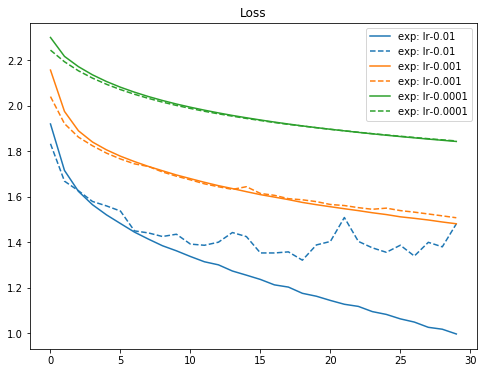

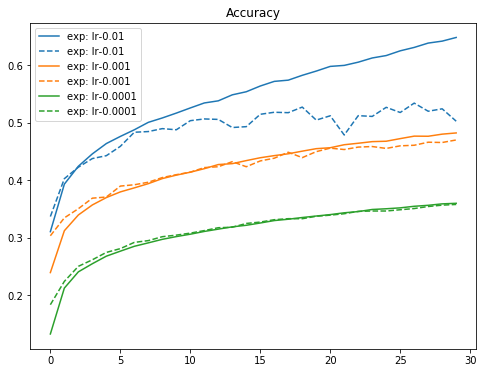

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-loss'])),results_SGD[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-loss'])),results_SGD[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-acc'])),results_SGD[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-acc'])),results_SGD[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

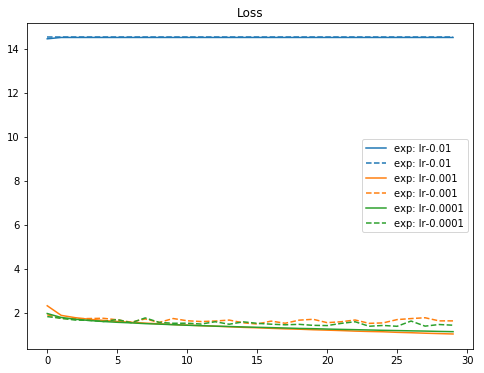

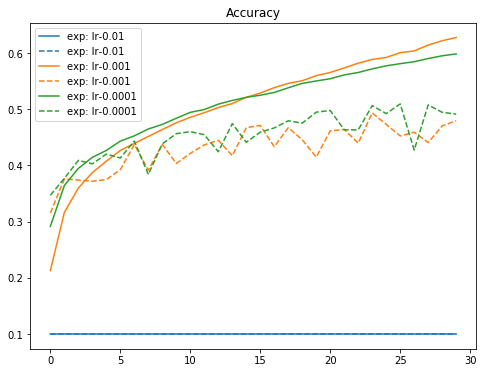

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_RMS.keys()):
    plt.plot(range(len(results_RMS[cond]['train-loss'])),results_RMS[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_RMS[cond]['valid-loss'])),results_RMS[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_RMS.keys()):
    plt.plot(range(len(results_RMS[cond]['train-acc'])),results_RMS[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_RMS[cond]['valid-acc'])),results_RMS[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

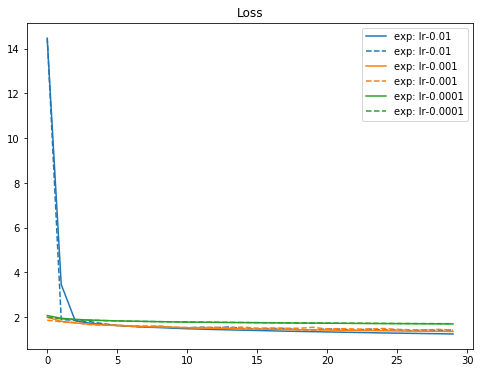

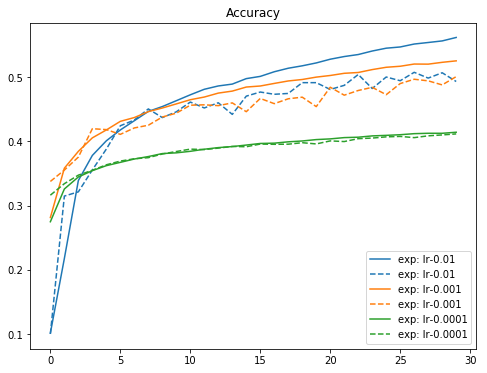

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Ada.keys()):
    plt.plot(range(len(results_Ada[cond]['train-loss'])),results_Ada[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Ada[cond]['valid-loss'])),results_Ada[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Ada.keys()):
    plt.plot(range(len(results_Ada[cond]['train-acc'])),results_Ada[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Ada[cond]['valid-acc'])),results_Ada[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

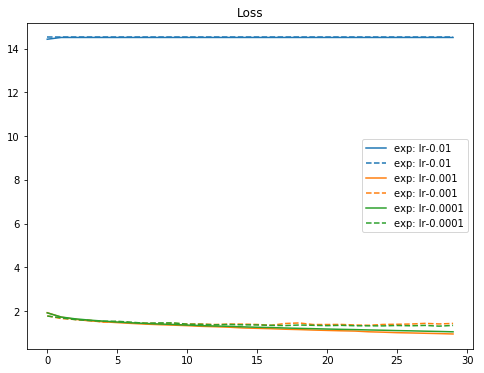

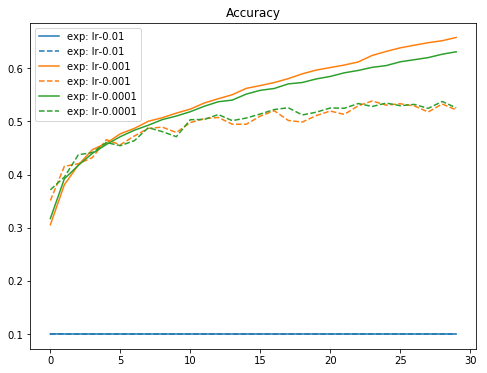

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adam.keys()):
    plt.plot(range(len(results_Adam[cond]['train-loss'])),results_Adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adam[cond]['valid-loss'])),results_Adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adam.keys()):
    plt.plot(range(len(results_Adam[cond]['train-acc'])),results_Adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adam[cond]['valid-acc'])),results_Adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()